<a href="https://colab.research.google.com/github/151ali/lr-pytorch/blob/main/custom_dataset_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F

In [ ]:
import torchvision.transforms as transforms
from torchvision.utils import save_image
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision

In [ ]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import numpy as np
import  os 

In [ ]:
device = torch.device(
    "cuda" if torch.cuda.is_available()
    else "cpu"
)
print(device)

cpu


In [ ]:
in_channel = 3
num_classes = 10
learning_rate = 1e-3
batch_size = 512
num_epochs = 5

In [ ]:
!pip install kaggle==1.5.12;

In [ ]:
# upload our kaggle.json file on your machine.
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

 98% 425M/435M [00:02<00:00, 157MB/s]
100% 435M/435M [00:02<00:00, 153MB/s]


In [ ]:
!unzip dogs-cats-images.zip && rm dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [ ]:
# create a dummy dataset
!mkdir dummy-dataset

!mv /content/dog\ vs\ cat/dataset/test_set/cats/* dummy-dataset
!mv /content/dog\ vs\ cat/dataset/test_set/dogs/* dummy-dataset
!rm -r dog\ vs\ cat dataset

In [ ]:
for i in os.listdir("dummy-dataset"):
  print(i)
  if "cat" in i:
    os.system(f"echo {i},0 >> annotations.csv")
  else:
    os.system(f"echo {i},1 >> annotations.csv")

cat.4085.jpg
cat.4419.jpg
cat.4539.jpg
cat.4004.jpg
dog.4007.jpg
cat.4915.jpg
dog.4799.jpg
dog.4178.jpg
dog.4324.jpg
dog.4127.jpg
cat.4562.jpg
cat.4812.jpg
cat.4698.jpg
cat.4496.jpg
dog.4785.jpg
cat.4234.jpg
cat.4613.jpg
dog.4921.jpg
dog.4845.jpg
dog.4249.jpg
dog.4354.jpg
dog.4486.jpg
dog.4047.jpg
cat.4222.jpg
cat.4148.jpg
cat.4569.jpg
dog.4663.jpg
cat.4665.jpg
dog.4806.jpg
cat.4853.jpg
dog.4030.jpg
cat.4717.jpg
dog.4401.jpg
dog.4831.jpg
dog.4399.jpg
dog.4039.jpg
dog.4701.jpg
cat.4553.jpg
dog.4334.jpg
dog.4255.jpg
dog.4606.jpg
dog.4871.jpg
cat.4297.jpg
dog.4108.jpg
cat.4454.jpg
cat.4558.jpg
dog.4045.jpg
cat.4387.jpg
cat.4429.jpg
cat.4827.jpg
cat.4416.jpg
cat.4595.jpg
cat.4991.jpg
dog.4148.jpg
dog.4776.jpg
dog.4899.jpg
dog.4602.jpg
dog.4794.jpg
cat.4374.jpg
dog.4455.jpg
dog.4736.jpg
dog.4321.jpg
cat.4098.jpg
cat.4141.jpg
dog.4600.jpg
dog.4549.jpg
cat.4124.jpg
dog.4685.jpg
dog.4910.jpg
cat.4214.jpg
cat.4210.jpg
cat.4802.jpg
cat.4203.jpg
dog.4115.jpg
cat.4166.jpg
dog.4412.jpg
cat.4926.jpg

In [ ]:
class  CatsandDogs(Dataset):
  def __init__(self,
               csv_file,
               root_dir,
               transform=None
               ):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir    = root_dir
    self.transform   = transform

  def __len__(self):
    return len(self.annotations) # bezaaaf

  def __getitem__(self, idx):
    img_path = os.path.join(
        self.root_dir,
        self.annotations.iloc[idx, 0]
        )
    image = io.imread(img_path)
    y_label = torch.tensor(
        int(self.annotations.iloc[idx, 1])
    )

    if self.transform :
      image = self.transform(image)

    return (image, y_label)

In [ ]:
# u
tr0 = transforms.ToTensor()

# Image transforms
tr = transforms.Compose([
  transforms.ToPILImage(),

  transforms.Resize(256,256),
  transforms.RandomCrop((224,224)),
  transforms.ColorJitter(brightness=0.5),
  transforms.RandomRotation(p=0.5),
  transforms.RandomGrayscale(p=0.5),
  transforms.RandomVerticalFlip(p=0.05),
  transforms.RandomHorizontalFlip(p=0.5), 
  
  transforms.ToTensor(),
  transforms.Normalize(
    mean= [.0, .0, .0],
    std = [1.0, 1.0 ,1.0]
  )
])

In [ ]:
dataset = CatsandDogs(
    csv_file = "annotations.csv",
    root_dir = "dummy-dataset",
    transform=tr0
    )

train_loader = DataLoader(dataset, batch_size=batch_size,shuffle=True)

In [ ]:
dataset[0][0]

tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize :{
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

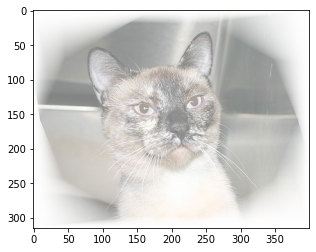

In [ ]:
imshow(dataset[0][0])